<a href="https://colab.research.google.com/github/Kennetrl/Student-Study-Performance/blob/main/Student_Study_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Study Performance**

### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the dataframe

In [2]:
file_path = '/content/study_performance.csv'
df = pd.read_csv(file_path, encoding='windows-1252')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Display the summary of the DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
print(df.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


# Cleaning up the data

### Display the number of null values and duplicate values.

In [5]:
df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [6]:
df.duplicated().sum()

0

### Identifying Unique Values in DataFrame Columns

In [7]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
  print(f'Columna: {col}')
  print(f'Número de valores únicos: {len(values)}')
  print(f'Valores únicos: {values[:10]}')
  print('-'*50)


Columna: gender
Número de valores únicos: 2
Valores únicos: ['female' 'male']
--------------------------------------------------
Columna: race_ethnicity
Número de valores únicos: 5
Valores únicos: ['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------
Columna: parental_level_of_education
Número de valores únicos: 6
Valores únicos: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------------------------------------
Columna: lunch
Número de valores únicos: 2
Valores únicos: ['standard' 'free/reduced']
--------------------------------------------------
Columna: test_preparation_course
Número de valores únicos: 2
Valores únicos: ['none' 'completed']
--------------------------------------------------
Columna: math_score
Número de valores únicos: 81
Valores únicos: [72 69 90 47 76 71 88 40 64 38]
--------------------------------------------------
Columna: reading_score


### Create a new clean data frame

In [8]:
df_cleaned = df.duplicated()
df_cleaned = df.dropna(subset=['gender']) #Example, because we have no missing values.

### Display the number of null values and duplicate values the new clean dataframe.

In [9]:
df_cleaned.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [10]:
df_cleaned.duplicated().sum()

0

# Data Exploration!

###Create a new column 'Average'

In [11]:
df['Average'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score    Average  
0                    none          72             72             74  72.666667  
1               completed          69             90             88  82.333333  
2                    none          90             95             93  92.666667  
3                    none          47             57             44  49.333333  
4                    none          76             78             75  76.333333  


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   Average                      1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB
None


### Average of male and female gender

In [13]:
#We get the mean of the average of each gender.
men = df[df['gender']=='male']
men_average = men['Average'].mean()
women = df[df['gender']=='female']
women_average = women['Average'].mean()

Pie Chart - Average of male and female gender

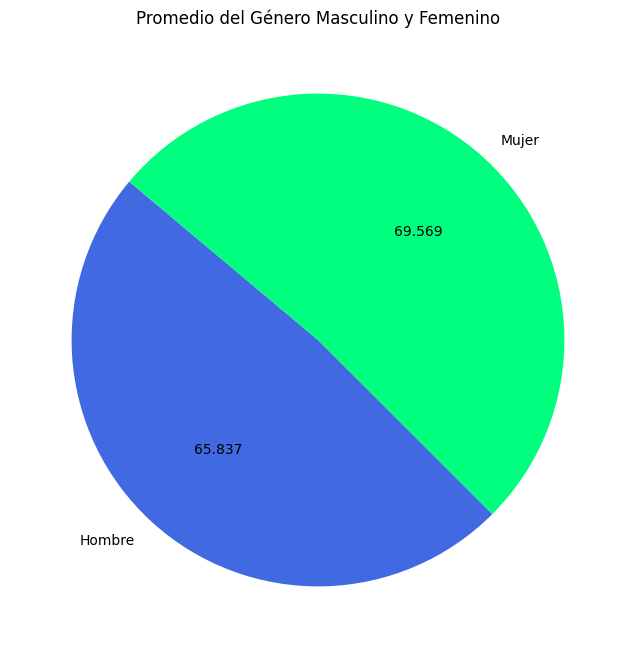

In [14]:
labels = ['Hombre', 'Mujer']
average_gender = [men_average, women_average]
color = ['royalblue', 'springgreen']

plt.figure(figsize=(8,8))
#Creating the pie chart and customizing texts:
plt.pie(average_gender, labels=labels ,autopct=lambda x: f'{x * sum(average_gender) / 100:.3f}', colors=color,startangle=140, labeldistance=1.1)
plt.title('Promedio del Género Masculino y Femenino')
plt.show()

### Average of the different groups

In [15]:
#We obtain the mean of each group in alphabetical order.
group_means = {}
for group in ['group A', 'group B', 'group C', 'group D', 'group E']:
    group_mean = df[df['race_ethnicity'] == group]['Average'].mean()
    group_means[group] = group_mean
group_a = group_means['group A']
group_b = group_means['group B']
group_c = group_means['group C']
group_d = group_means['group D']
group_e = group_means['group E']

Bar Chart - Average of the different groups

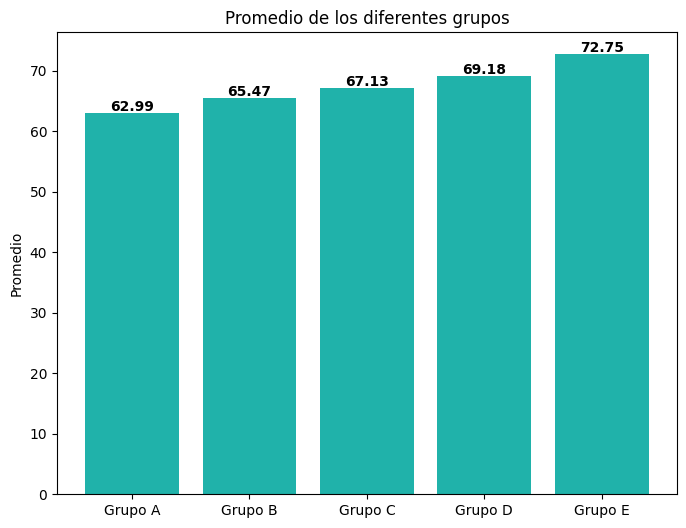

In [16]:
labels = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']
groups_average = [group_a, group_b, group_c, group_d, group_e]

plt.figure(figsize=(8,6))
bars = plt.bar(labels, groups_average, color='lightseagreen', label='Grupos')

# Add the average in the middle of each bar
for bar, avg in zip(bars, groups_average):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+1, f'{avg:.2f}',
             ha='center', va='center', fontsize=10, color='black', weight='bold')
plt.title('Promedio de los diferentes grupos')
plt.ylabel('Promedio')
plt.show()

### Average of each subject.

In [17]:
#We get the average of each subject.
math_score = df['math_score'].mean()
reading_score = df['reading_score'].mean()
writing_score = df['writing_score'].mean()

Barh chart - Average of each subject.

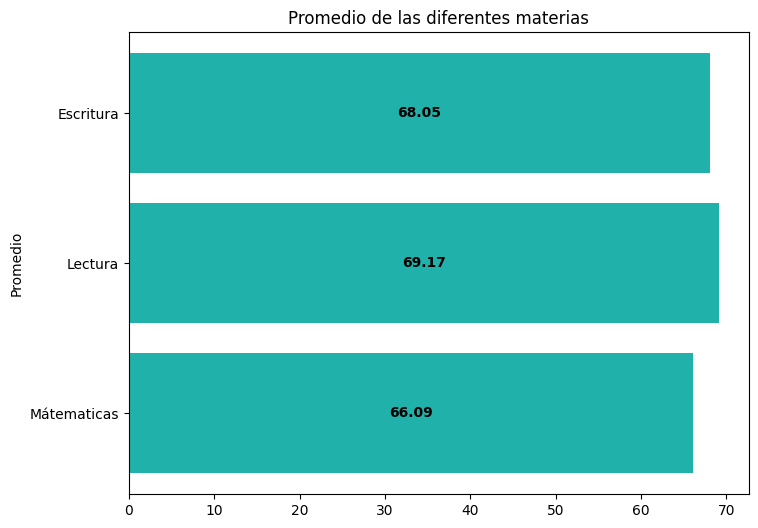

In [18]:
labels = ['Mátematicas', 'Lectura', 'Escritura']
subjects_average = [math_score, reading_score, writing_score]

plt.figure(figsize=(8,6))
bars = plt.barh(labels, subjects_average, color='lightseagreen', label='Materias')
# Add the average in the middle of each bar
for bar, avg in zip(bars, subjects_average):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height()/2, f'{avg:.2f}',
             ha='center', va='center', fontsize=10, color='black', weight='bold')
plt.title('Promedio de las diferentes materias')
plt.ylabel('Promedio')
plt.show()

### Average with or without test preparation

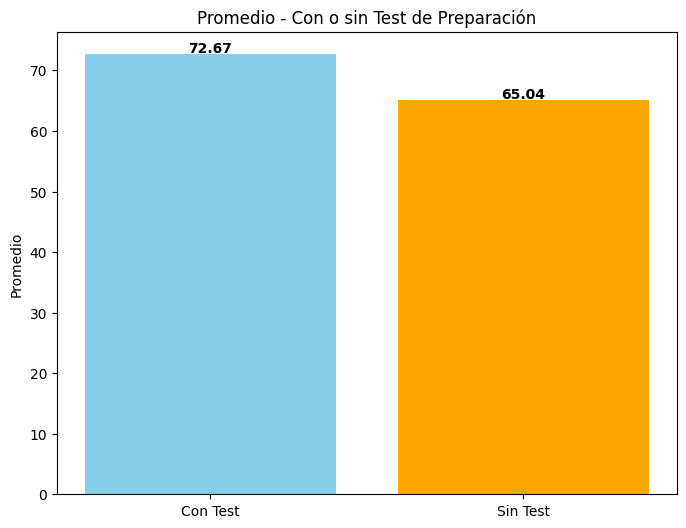

In [19]:
test_completed = df[df['test_preparation_course']== 'completed']
test_none = df[df['test_preparation_course']== 'none']

labels = ['Con Test', 'Sin Test']
tests = [test_completed['Average'].mean(),test_none['Average'].mean()]
plt.figure(figsize=(8,6))
bars = plt.bar(labels, tests, color=['skyblue', 'orange'], label='Test')
# Add the average in the middle of each bar
for bar, avg in zip(bars, tests):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+1, f'{avg:.2f}',
             ha='center', va='center', fontsize=10, color='black', weight='bold')
plt.title('Promedio - Con o sin Test de Preparación')
plt.ylabel('Promedio')
plt.show()

### Average with standard lunch or reduced lunch

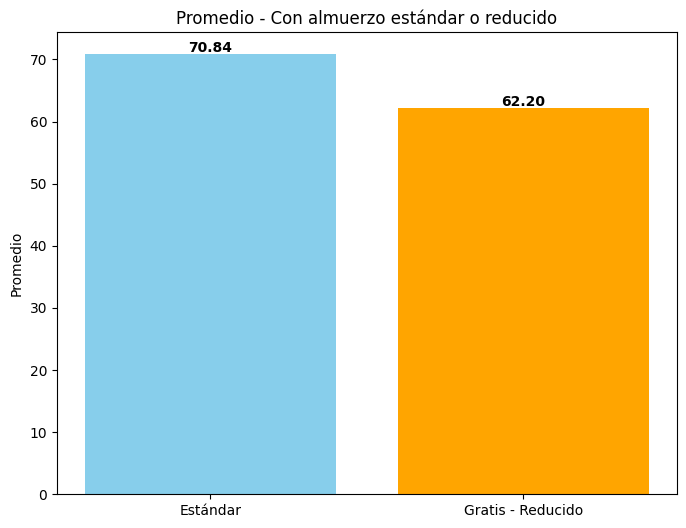

In [20]:
#Separate, standard and free/reduced
standard = df[df['lunch']== 'standard']
free_reduced = df[df['lunch']== 'free/reduced']

labels = ['Estándar', 'Gratis - Reducido']
lunch = [standard['Average'].mean(),free_reduced['Average'].mean()]
plt.figure(figsize=(8,6))
bars = plt.bar(labels, lunch, color=['skyblue', 'orange'], label='Test')
# Add the average in the middle of each bar
for bar, avg in zip(bars, lunch):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+1, f'{avg:.2f}',
             ha='center', va='center', fontsize=10, color='black', weight='bold')
plt.title('Promedio - Con almuerzo estándar o reducido')
plt.ylabel('Promedio')
plt.show()

### Average in relation to parents' profession

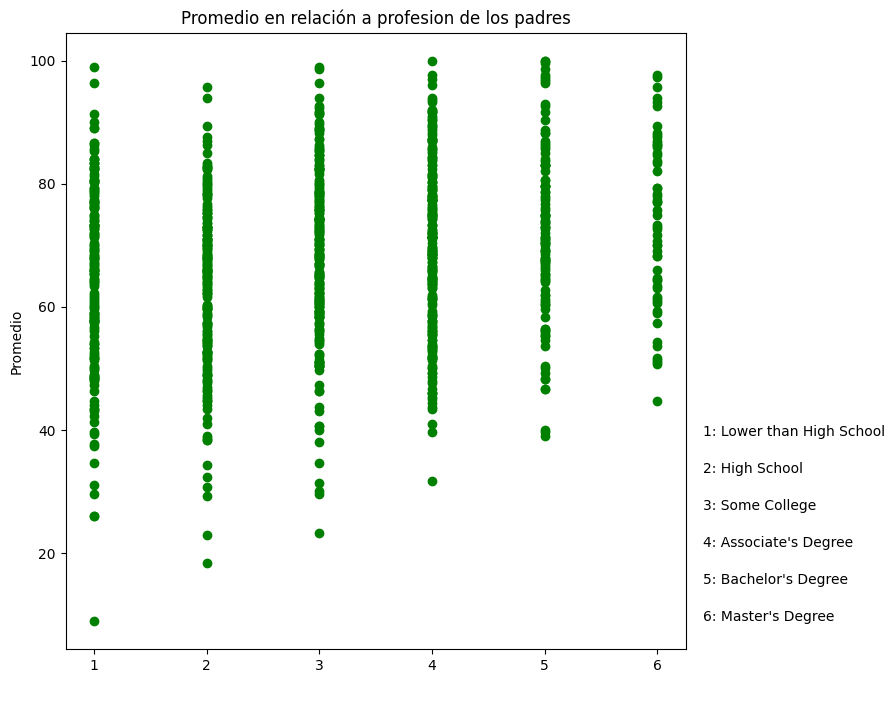

In [21]:
# Function that assigns a number based on the education level
def category(level):
  if level == "master's degree":
    return 6
  elif level == "bachelor's degree":
    return 5
  elif level == "associate's degree":
    return 4
  elif level == "some college":
    return 3
  elif level == "high school":
    return 2
  else:
    return 1

df['levels'] = df['parental_level_of_education'].apply(category)

plt.figure(figsize=(8,8))
plt.scatter(df['levels'], df['Average'], marker='o', color='green', linestyle='-', label='Niveles')

# Define the levels and their meanings
meanings = {
    6: "Master's Degree",
    5: "Bachelor's Degree",
    4: "Associate's Degree",
    3: "Some College",
    2: "High School",
    1: "Lower than High School"
}

# Add meaning of levels to the side of the chart
for i, (level, meaning) in enumerate(meanings.items()):
    plt.text(6.4, df['Average'].min() + i * 6, f"{level}: {meaning}", fontsize=10)

plt.title('Promedio en relación a profesion de los padres')
plt.ylabel('Promedio')
plt.xlabel(" ")
plt.show()

### Relationship between averages (Math, Reading, Writing)

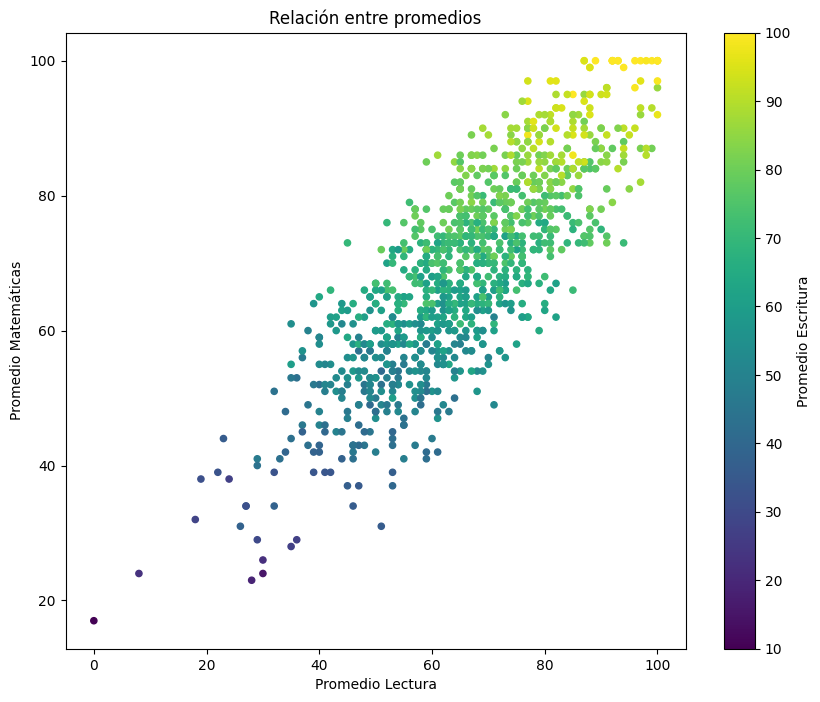

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(df['math_score'], df['reading_score'], c=df['writing_score'], cmap='viridis', marker='o', linestyle='-', label='Math, reading, writing', s=20)
#plt.scatter(df['math_score'], df['reading_score'], marker='o', color='lightskyblue', linestyle='-', label='Math and Writing')
#plt.scatter(df['math_score'], df['writing_score'], marker='o', color='yellowgreen', linestyle='-', label='Math and Writing')
#plt.scatter(df['writing_score'], df['reading_score'], marker='o', color='coral', linestyle='-', label='Writing and Reading')

plt.title('Relación entre promedios')
plt.xlabel('Promedio Lectura')
plt.ylabel('Promedio Matemáticas')
plt.colorbar(label='Promedio Escritura')
plt.show()

# First Dashboard

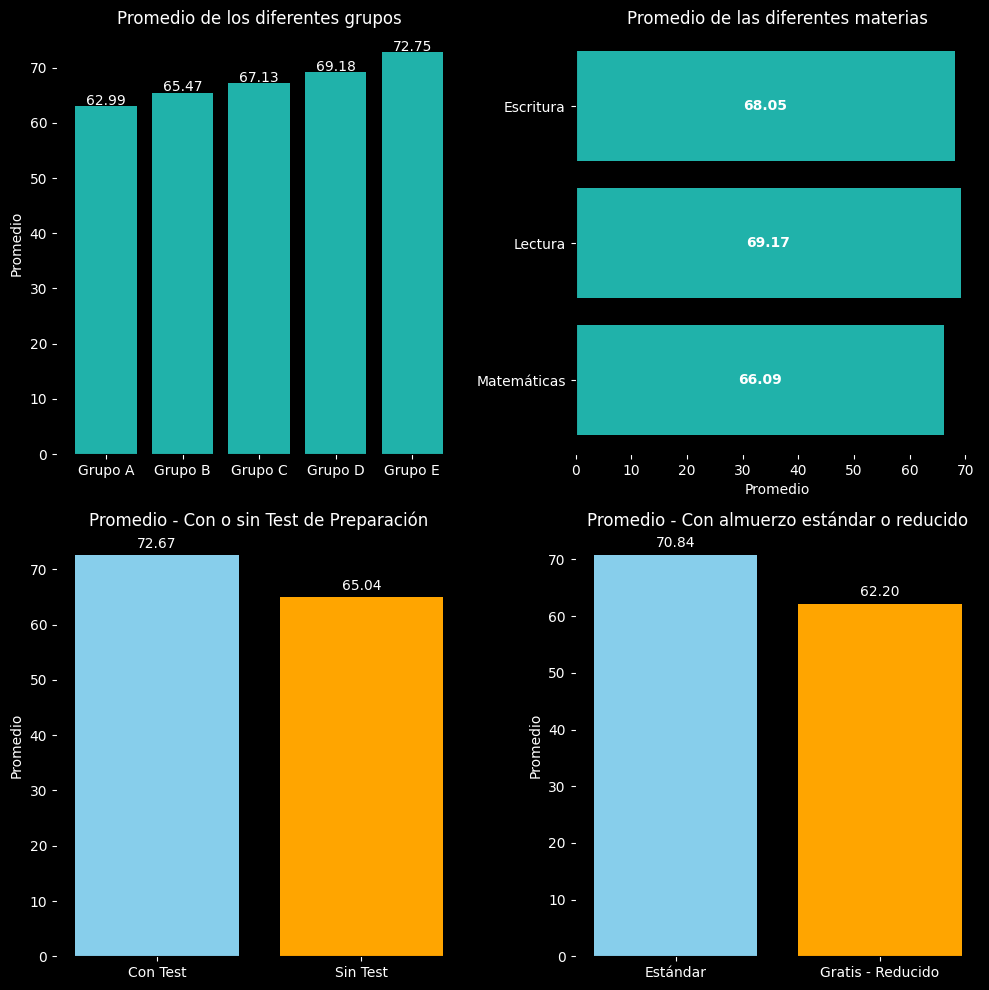

In [23]:
#2x2 grid for organizing graphs into a figure.
gs = plt.GridSpec(2, 2)
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('black')

#Figure 1
labels = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']
groups_average = [group_a, group_b, group_c, group_d, group_e]

ax1 =  fig.add_subplot(gs[0,0])
bars = ax1.bar(labels, groups_average, color='lightseagreen', label='Grupos')
# Add the average in the middle of each bar
for bar, avg in zip(bars, groups_average):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+1, f'{avg:.2f}',
             ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Promedio de los diferentes grupos', color='white')
ax1.set_ylabel('Promedio', color='white')
ax1.set_facecolor('black')
ax1.tick_params(colors='white')

#Figure 2
ax2 = fig.add_subplot(gs[0,1])
labels = ['Matemáticas', 'Lectura', 'Escritura']
subjects_average = [math_score, reading_score, writing_score]

bars = ax2.barh(labels, subjects_average, color='lightseagreen', label='Materias')
# Add the average in the middle of each bar
for bar, avg in zip(bars, subjects_average):
    ax2.text(bar.get_width() / 2, bar.get_y() + bar.get_height()/2, f'{avg:.2f}',
             ha='center', va='center', fontsize=10, color='white', weight='bold')
ax2.set_title('Promedio de las diferentes materias', color='white')
ax2.set_xlabel('Promedio', color='white')
ax2.set_facecolor('black')
ax2.tick_params(colors='white')

#Figure 3
test_completed = df[df['test_preparation_course']== 'completed']
test_none = df[df['test_preparation_course']== 'none']

labels = ['Con Test', 'Sin Test']
tests = [test_completed['Average'].mean(),test_none['Average'].mean()]

ax3 = fig.add_subplot(gs[1,0])
bars = ax3.bar(labels, tests, color=['skyblue', 'orange'], label='Test')
# Add the average in the middle of each bar
for bar, avg in zip(bars, tests):
    plt.text(bar.get_x() + bar.get_width()/ 2, bar.get_height() + 2, f'{avg:.2f}',
             ha='center', va='center', fontsize=10, color='white')
ax3.set_title('Promedio - Con o sin Test de Preparación', color='white')
ax3.set_ylabel('Promedio', color='white')
ax3.set_facecolor('black')
ax3.tick_params(colors='white')


#Figure 4
standard = df[df['lunch']== 'standard']
free_reduced = df[df['lunch']== 'free/reduced']

labels = ['Estándar', 'Gratis - Reducido']
lunch = [standard['Average'].mean(),free_reduced['Average'].mean()]

ax4 = fig.add_subplot(gs[1,1])
bars = ax4.bar(labels, lunch, color=['skyblue', 'orange'], label='Test')
# Add the average in the middle of each bar
for bar, avg in zip(bars, lunch):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+2, f'{avg:.2f}',
             ha='center', va='center', fontsize=10, color='white')
ax4.set_title('Promedio - Con almuerzo estándar o reducido', color='white')
ax4.set_ylabel('Promedio', color='white')
ax4.set_facecolor('black')
ax4.tick_params(colors='white')


plt.tight_layout()
plt.show()

# Second Dashboard

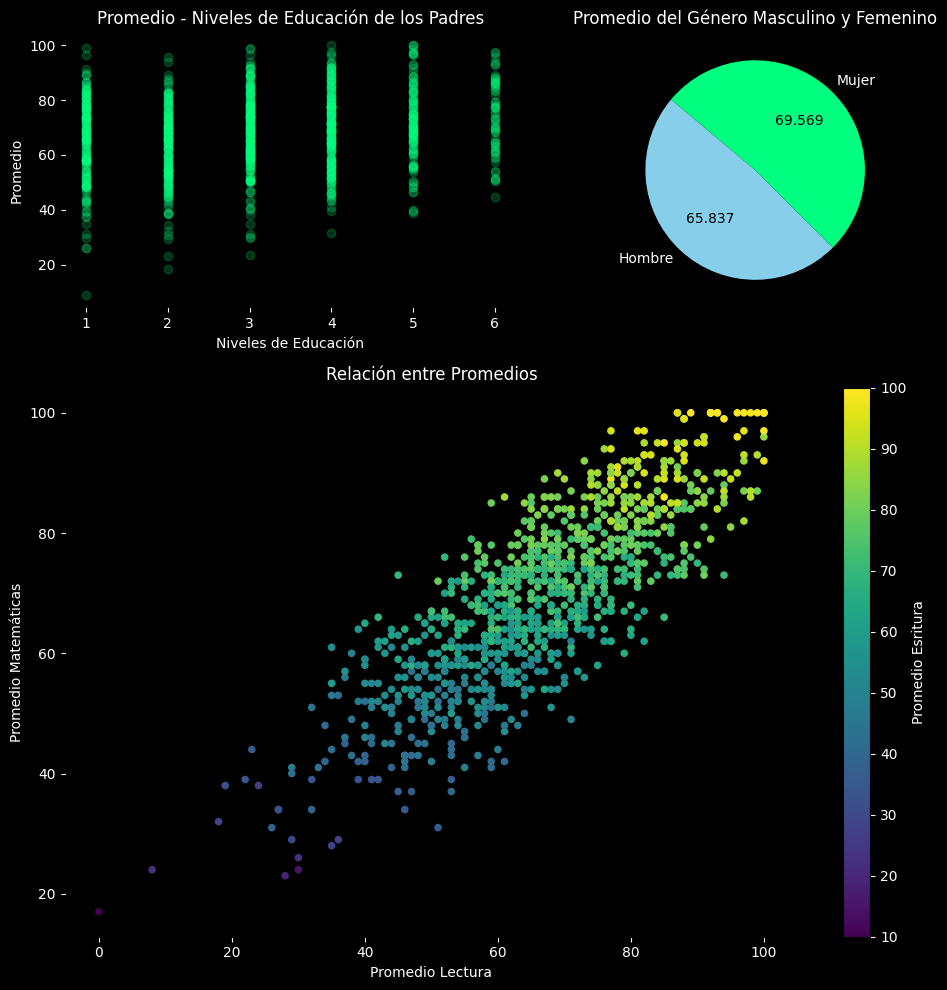

In [24]:
#2x2 grid where the second row is twice as high as the first, and both columns have the same width.
gs2 = plt.GridSpec(2, 2, height_ratios=[1,2], width_ratios=[1,1])
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('black')

#Figure 1
men = df[df['gender']=='male']
men_average = men['Average'].mean()
women = df[df['gender']=='female']
women_average = women['Average'].mean()

labels = ['Hombre', 'Mujer']
average_gender = [men_average, women_average]
color = ['skyblue', 'springgreen']

ax1 = fig.add_subplot(gs2[0,1])

#Creating the pie chart and customizing texts
wedges, texts, autotexts = ax1.pie(average_gender, labels=labels ,autopct=lambda x: f'{x * sum(average_gender) / 100:.3f}', colors=color,startangle=140, labeldistance=1.1)
for text in texts:
    text.set_color('white')
    text.set_fontweight('medium')

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('medium')

ax1.set_title('Promedio del Género Masculino y Femenino', color='white')


#Figure 2
def category(level):
  if level == "master's degree":
    return 6
  elif level == "bachelor's degree":
    return 5
  elif level == "associate's degree":
    return 4
  elif level == "some college":
    return 3
  elif level == "high school":
    return 2
  else:
    return 1

df['levels'] = df['parental_level_of_education'].apply(category)
ax2 = fig.add_subplot(gs2[0,0])
ax2.scatter(df['levels'], df['Average'], marker='o', color='springgreen', linestyle='-', label='Niveles', alpha=0.2)
ax2.set_title('Promedio - Niveles de Educación de los Padres', color='white')
ax2.set_ylabel('Promedio', color='white')
ax2.set_xlabel("Niveles de Educación", color='white')
ax2.set_facecolor('black')
ax2.tick_params(colors='white')

#Figure 3
ax3 = fig.add_subplot(gs2[1, :])
sc = ax3.scatter(df['math_score'], df['reading_score'], c=df['writing_score'], cmap='viridis', marker='o', linestyle='-', label='Math, Reading, Writing', s=20)
cbar = fig.colorbar(sc, ax=ax3, label='Promedio Esritura')

cbar.ax.yaxis.label.set_color('white')
cbar.ax.tick_params(colors='white')

#plt.scatter(df['math_score'], df['reading_score'], marker='o', color='lightskyblue', linestyle='-', label='Math and Writing')
#plt.scatter(df['math_score'], df['writing_score'], marker='o', color='yellowgreen', linestyle='-', label='Math and Writing')
#plt.scatter(df['writing_score'], df['reading_score'], marker='o', color='coral', linestyle='-', label='Writing and Reading')

ax3.set_title('Relación entre Promedios', color='white')
ax3.set_xlabel('Promedio Lectura', color='white')
ax3.set_ylabel('Promedio Matemáticas', color='white')
ax3.set_facecolor('black')
ax3.tick_params(colors='white')



plt.tight_layout()
plt.show()